In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten
from sklearn.utils import resample
import warnings 
warnings.filterwarnings(action = 'ignore')

from sklearn.model_selection import train_test_split

In [2]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [8]:
from datetime import datetime

In [3]:
df = pd.read_csv('../data/doc_train.csv')
df['clean_text'].fillna("No data", inplace = True)
df["new_token_words"].fillna("No data", inplace = True)

In [4]:
def accuracy_score(matrix):
    row = matrix.shape[0]
    total = 0
    for i in range(row):
        total += matrix[i][i]
    return total/matrix.sum()

def near_score(matrix):
    q=np.diag(matrix, k=1).sum()
    w =np.diag(matrix, k=-1).sum()
    total = 0
    for i in range(matrix.shape[0]):
        total += matrix[i][i]
    return (total+q+w)/matrix.sum()


# TFID with features

In [5]:
train_size = int(df.shape[0] * 0.8)
train_index = np.arange(train_size)
train_df = df[df.index.isin(train_index)]
test_df = df[~df.index.isin(train_index)]
print(f'train_df.shape is : {train_df.shape}, test_df is : {test_df.shape}')

train_df.shape is : (202696, 32), test_df is : (50674, 32)


In [6]:
tf = TfidfVectorizer(max_features= 5000)
labels = df['Score'].astype(str).tolist()
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_df['Score'].astype(str).tolist()))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(test_df['Score'].astype(str).tolist()))

In [7]:
features = ['HelpfulnessNumerator', 'HelpfulnessDenominator','words_count', 'unique_words', 'polarity',
       'subjectivity']
#vectorize train words and then transform them & combine the matrix with the new features to create the train's final matrix
x_words_train = tf.fit_transform(train_df["clean_text"].values.ravel()).toarray()
x_train_matrix = np.concatenate((x_words_train, train_df[features].values), axis =1)
# transform test words from tfidf fitted by the train words & combine test matrix with test new features
x_words_test = tf.transform(test_df["clean_text"].values.ravel()).toarray()
x_test_matrix = np.concatenate((x_words_test, test_df[features].values), axis =1)

In [22]:
start = datetime.now()
rf=RandomForestClassifier(n_estimators = 250, random_state = 42, max_features ='auto')

rf.fit(x_train_matrix, train_df['Score'].values)
y_hat = rf.predict(x_test_matrix)
test=pd.concat([test_df['Score'], pd.Series(y_hat, index = test_df.index)], axis = 1)
cm_mulit_com= confusion_matrix(test_df['Score'], y_hat)
print(cm_mulit_com)
end = datetim

[[ 3003     2     4     3  2041]
 [  274   955     9    14  1514]
 [  133     3  1442    31  2433]
 [   32     1     5  2586  4544]
 [   44     1     5    14 31581]]


In [33]:
print(classification_report(test_df['Score'], y_hat, target_names = ['1','2','3','4','5']))

              precision    recall  f1-score   support

           1       0.86      0.59      0.70      5053
           2       0.99      0.35      0.51      2766
           3       0.98      0.36      0.52      4042
           4       0.98      0.36      0.53      7168
           5       0.75      1.00      0.86     31645

    accuracy                           0.78     50674
   macro avg       0.91      0.53      0.62     50674
weighted avg       0.83      0.78      0.75     50674



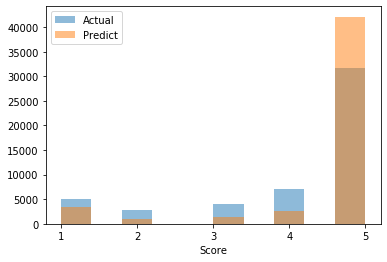

In [43]:
fig, ax = plt.subplots()

ax.hist(test_df['Score'], label = 'Actual', alpha = 0.5)
ax.hist(y_hat, alpha = 0.5, label = 'Predict')
x = np.arange(1,6)
labels = ['1', '2','3','4','5']

#ax.set_xticks(x)
#ax.set_xticklabels(squad, minor=False, rotation=45)
plt.xticks(x,labels)
plt.xlabel('Score')
plt.legend();
plt.savefig('pre_act_best_model_randomforest.png')

In [34]:
print(f'accuracy score: {accuracy_score(cm_mulit_com):.3f}, near prediction:{near_score(cm_mulit_com):.3f}')

accuracy score: 0.781, near prediction:0.877


In [36]:
# doc2vec_vector features are included in features
features = ['HelpfulnessNumerator', 'HelpfulnessDenominator','words_count', 'unique_words', 'polarity',
       'subjectivity', 'doc2vec_vector_0', 'doc2vec_vector_1',
       'doc2vec_vector_2', 'doc2vec_vector_3', 'doc2vec_vector_4']
#vectorize train words and then transform them & combine the matrix with the new features to create the train's final matrix
x_words_train = tf.fit_transform(train_df["clean_text"].values.ravel()).toarray()
x_train_matrix = np.concatenate((x_words_train, train_df[features].values), axis =1)
# transform test words from tfidf fitted by the train words & combine test matrix with test new features
x_words_test = tf.transform(test_df["clean_text"].values.ravel()).toarray()
x_test_matrix = np.concatenate((x_words_test, test_df[features].values), axis =1)

rf1=RandomForestClassifier(n_estimators = 250, random_state = 42, max_features ='auto')

rf1.fit(x_train_matrix, train_df['Score'].values)
y_hat1 = rf1.predict(x_test_matrix)
test=pd.concat([test_df['Score'], pd.Series(y_hat1, index = test_df.index)], axis = 1)

In [38]:
cm_mulit_com1= confusion_matrix(test_df['Score'], y_hat1)
print(cm_mulit_com1)

[[ 2957     2     4     2  2088]
 [  263   952     8    15  1528]
 [  124     5  1433    43  2437]
 [   34     1     3  2598  4532]
 [   42     1     4    12 31586]]


In [39]:
print(f'accuracy score: {accuracy_score(cm_mulit_com1):.3f}, near prediction:{near_score(cm_mulit_com1):.3f}')

accuracy score: 0.780, near prediction:0.876


# ANN with 3 hidden layers

In [9]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim = x_train_matrix.shape[1]))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 10
history_rnn = model.fit(x_train_matrix, training_label_seq, epochs=num_epochs, validation_data=(x_test_matrix, validation_label_seq), verbose=2)

Train on 202696 samples, validate on 50674 samples
Epoch 1/10
202696/202696 - 27s - loss: 0.8070 - accuracy: 0.6981 - val_loss: 0.7350 - val_accuracy: 0.7223
Epoch 2/10
202696/202696 - 26s - loss: 0.7184 - accuracy: 0.7269 - val_loss: 0.7014 - val_accuracy: 0.7350
Epoch 3/10
202696/202696 - 26s - loss: 0.6829 - accuracy: 0.7418 - val_loss: 0.7125 - val_accuracy: 0.7341
Epoch 4/10
202696/202696 - 26s - loss: 0.6527 - accuracy: 0.7540 - val_loss: 0.6734 - val_accuracy: 0.7502
Epoch 5/10
202696/202696 - 26s - loss: 0.6222 - accuracy: 0.7660 - val_loss: 0.6802 - val_accuracy: 0.7481
Epoch 6/10
202696/202696 - 27s - loss: 0.5914 - accuracy: 0.7778 - val_loss: 0.6784 - val_accuracy: 0.7559
Epoch 7/10
202696/202696 - 26s - loss: 0.5631 - accuracy: 0.7899 - val_loss: 0.6903 - val_accuracy: 0.7522
Epoch 8/10
202696/202696 - 26s - loss: 0.5366 - accuracy: 0.7999 - val_loss: 0.6777 - val_accuracy: 0.7590
Epoch 9/10
202696/202696 - 26s - loss: 0.5131 - accuracy: 0.8086 - val_loss: 0.6911 - val_acc

In [37]:
model1 = Sequential()
model1.add(Dense(512, activation = 'relu', input_dim = x_train_matrix.shape[1]))
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(24, activation='relu'))
model1.add(Dense(6, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 10
history_rnn_1 = model1.fit(x_train_matrix, training_label_seq, epochs=num_epochs, validation_data=(x_test_matrix, validation_label_seq), verbose=2)

Train on 202696 samples, validate on 50674 samples
Epoch 1/10
202696/202696 - 76s - loss: 0.8230 - accuracy: 0.6960 - val_loss: 0.7439 - val_accuracy: 0.7272
Epoch 2/10
202696/202696 - 76s - loss: 0.7193 - accuracy: 0.7276 - val_loss: 0.7127 - val_accuracy: 0.7283
Epoch 3/10
202696/202696 - 75s - loss: 0.6812 - accuracy: 0.7418 - val_loss: 0.7943 - val_accuracy: 0.6995
Epoch 4/10
202696/202696 - 74s - loss: 0.6428 - accuracy: 0.7571 - val_loss: 0.7267 - val_accuracy: 0.7396
Epoch 5/10
202696/202696 - 75s - loss: 0.6095 - accuracy: 0.7708 - val_loss: 0.6623 - val_accuracy: 0.7554
Epoch 6/10
202696/202696 - 78s - loss: 0.5722 - accuracy: 0.7850 - val_loss: 0.6797 - val_accuracy: 0.7556
Epoch 7/10
202696/202696 - 76s - loss: 0.5404 - accuracy: 0.7979 - val_loss: 0.6868 - val_accuracy: 0.7513
Epoch 8/10
202696/202696 - 75s - loss: 0.5094 - accuracy: 0.8096 - val_loss: 0.6974 - val_accuracy: 0.7609
Epoch 9/10
202696/202696 - 75s - loss: 0.4814 - accuracy: 0.8205 - val_loss: 0.7049 - val_acc

# ANN with 4 hidden layers

In [10]:
model2 = Sequential()
model2.add(Dense(256, activation = 'relu', input_dim = x_train_matrix.shape[1]))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(6, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 10
history_rnn_2 = model2.fit(x_train_matrix, training_label_seq, epochs=num_epochs, validation_data=(x_test_matrix, validation_label_seq), verbose=2)

Train on 202696 samples, validate on 50674 samples
Epoch 1/10
202696/202696 - 48s - loss: 0.8183 - accuracy: 0.6953 - val_loss: 0.7226 - val_accuracy: 0.7252
Epoch 2/10
202696/202696 - 47s - loss: 0.7193 - accuracy: 0.7262 - val_loss: 0.7173 - val_accuracy: 0.7280
Epoch 3/10
202696/202696 - 48s - loss: 0.6830 - accuracy: 0.7406 - val_loss: 0.7726 - val_accuracy: 0.7295
Epoch 4/10
202696/202696 - 46s - loss: 0.6485 - accuracy: 0.7538 - val_loss: 0.6907 - val_accuracy: 0.7428
Epoch 5/10
202696/202696 - 46s - loss: 0.6148 - accuracy: 0.7676 - val_loss: 0.6871 - val_accuracy: 0.7452
Epoch 6/10
202696/202696 - 46s - loss: 0.5848 - accuracy: 0.7789 - val_loss: 0.6872 - val_accuracy: 0.7489
Epoch 7/10
202696/202696 - 45s - loss: 0.5578 - accuracy: 0.7890 - val_loss: 0.6982 - val_accuracy: 0.7476
Epoch 8/10
202696/202696 - 46s - loss: 0.5325 - accuracy: 0.7990 - val_loss: 0.7023 - val_accuracy: 0.7550
Epoch 9/10
202696/202696 - 47s - loss: 0.5063 - accuracy: 0.8089 - val_loss: 0.7197 - val_acc

In [24]:
tdif_ann= {'1_acc': history_rnn.history['val_accuracy'],
        '1_loss': history_rnn.history['val_loss'],
          '2_acc': history_rnn_2.history['val_accuracy'],
        '2_loss': history_rnn_2.history['val_loss']}
tdif_ann_df = pd.DataFrame(tdif_ann)

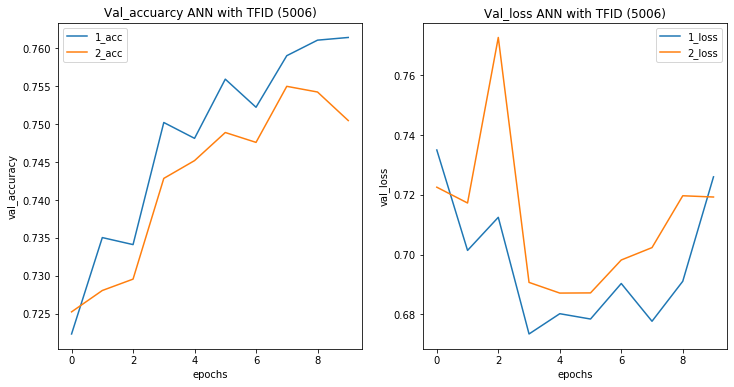

In [25]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))
tdif_ann_df[['1_acc','2_acc']].plot(ax = axs[0])

axs[0].set_xlabel('epochs')
axs[0].set_ylabel('val_accuracy')

axs[0].set_title('Val_accuarcy ANN with TFID (5006)')
tdif_ann_df[['1_loss','2_loss']].plot(ax = axs[1])

axs[1].set_title('Val_loss ANN with TFID (5006)')
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('val_loss');

# Balanced Data

In [6]:
df_5 = df[df['Score'] == 5]
df_4 = df[df['Score'] == 4]
df_3 = df[df['Score'] == 3]
df_2 = df[df['Score'] == 2]
df_1 = df[df['Score'] == 1]

In [9]:
df_5_downsampled = resample(df_5, replace=False,    # sample without replacement
                            n_samples=14168,     # to match minority class
                            random_state=123)
df_4_downsampled = resample(df_4, replace=False,    # sample without replacement
                            n_samples=14168,     # to match minority class
                            random_state=123)
df_3_downsampled = resample(df_3, replace=False,    # sample without replacement
                            n_samples=14168,     # to match minority class
                            random_state=123)
df_1_downsampled = resample(df_1, replace=False,    # sample without replacement
                            n_samples=14168,     # to match minority class
                            random_state=123)

In [10]:
# Combine minority class with downsampled majority class
df_downsampled_mulit = pd.concat([df_5_downsampled, df_4_downsampled, df_3_downsampled,df_1_downsampled,df_2])
# Display new class counts
df_downsampled_mulit['Score'].value_counts()

5    14168
4    14168
3    14168
2    14168
1    14168
Name: Score, dtype: int64

In [24]:
df_downsampled_mulit.columns

Index(['Unnamed: 0', 'Id', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text', 'clean_text', 'token_words', 'join_token', 'Date',
       'year', 'words_count', 'unique_words', 'new_token_words',
       'data_lemmatized', 'polarity', 'subjectivity', 'doc2vec_vector_0',
       'doc2vec_vector_1', 'doc2vec_vector_2', 'doc2vec_vector_3',
       'doc2vec_vector_4', 'doc2vec_vector_5', 'doc2vec_vector_6',
       'doc2vec_vector_7', 'doc2vec_vector_8', 'doc2vec_vector_9'],
      dtype='object')

In [25]:
interested_features = ['HelpfulnessNumerator', 'HelpfulnessDenominator','words_count', 'unique_words', 'polarity',
       'subjectivity']

X_train, X_test, y_train, y_test = train_test_split(df_downsampled_mulit[['new_token_words']],
                                                    df_downsampled_mulit['Score'], 
                                                    test_size = 0.20, random_state = 42)

tfidf_multi = TfidfVectorizer(max_features= 5000)

In [26]:
X_train.head(3)

,new_token_words
93628,nice watermelon flavor candi complaintand real...
135934,bought cooki cost plu world market run promot ...
188647,love item best honey mustard market today disa...


In [27]:
df_downsampled_mulit.shape[0] * 0.8

56672.0

In [28]:
X_train.shape

(56672, 1)

In [31]:
y_train.value_counts(normalize = True)

4    0.200469
2    0.200416
5    0.200011
1    0.199922
3    0.199181
Name: Score, dtype: float64

In [32]:
y_test.value_counts(normalize = True)

3    0.203275
1    0.200311
5    0.199958
2    0.198334
4    0.198123
Name: Score, dtype: float64

In [29]:
#vectorize train words and then transform them & combine the matrix with the new features to create the train's final matrix
x_words_train_b = tfidf_multi.fit_transform(X_train.values.ravel()).toarray()


# transform test words from tfidf fitted by the train words & combine test matrix with test new features
x_words_test_b = tfidf_multi.transform(X_test.values.ravel()).toarray()


In [33]:
labels = df_downsampled_mulit['Score'].astype(str).tolist()
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
training_label_seq = np.array(label_tokenizer.texts_to_sequences(y_train.astype(str).tolist()))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(y_test.astype(str).tolist()))

In [36]:
model1 = Sequential()
model1.add(Dense(512, activation = 'relu', input_dim = x_words_train_b.shape[1]))
model1.add(Dropout(0.25))
model1.add(Dense(256, activation = 'relu'))
model1.add(Dense(128, activation = 'relu'))
model1.add(Dropout(0.25))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(24, activation='relu'))
model1.add(Dense(6, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 30
history_rnn1 = model1.fit(x_words_train_b, training_label_seq, 
                          epochs=num_epochs, 
                          validation_data=(x_words_test_b, validation_label_seq), verbose=2)

Train on 56672 samples, validate on 14168 samples
Epoch 1/30
56672/56672 - 21s - loss: 1.2066 - accuracy: 0.4832 - val_loss: 1.1129 - val_accuracy: 0.5374
Epoch 2/30
56672/56672 - 19s - loss: 0.9231 - accuracy: 0.6346 - val_loss: 1.0548 - val_accuracy: 0.5783
Epoch 3/30
56672/56672 - 19s - loss: 0.5778 - accuracy: 0.7814 - val_loss: 1.1476 - val_accuracy: 0.5951
Epoch 4/30
56672/56672 - 19s - loss: 0.3156 - accuracy: 0.8859 - val_loss: 1.4563 - val_accuracy: 0.5943
Epoch 5/30
56672/56672 - 19s - loss: 0.1780 - accuracy: 0.9398 - val_loss: 1.6611 - val_accuracy: 0.5937
Epoch 6/30
56672/56672 - 19s - loss: 0.1155 - accuracy: 0.9608 - val_loss: 1.8622 - val_accuracy: 0.5975
Epoch 7/30
56672/56672 - 19s - loss: 0.0869 - accuracy: 0.9705 - val_loss: 2.0184 - val_accuracy: 0.5937
Epoch 8/30
56672/56672 - 19s - loss: 0.0669 - accuracy: 0.9771 - val_loss: 2.2438 - val_accuracy: 0.5978
Epoch 9/30
56672/56672 - 19s - loss: 0.0591 - accuracy: 0.9812 - val_loss: 2.0945 - val_accuracy: 0.5990
Epoch

Since the val_loss is way too high!!! it indicates that it is overfitting to training data. I need to adjust the model to be less complicated

In [38]:
model2 = Sequential()
model2.add(Dense(256, activation = 'relu', input_dim = x_words_train_b.shape[1]))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(6, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 10
history_ann_2 = model2.fit(x_words_train_b, training_label_seq, 
                           epochs=num_epochs, 
                           validation_data=(x_words_test_b, validation_label_seq), 
                           verbose=2)

Train on 56672 samples, validate on 14168 samples
Epoch 1/10
56672/56672 - 13s - loss: 1.1861 - accuracy: 0.4972 - val_loss: 1.1040 - val_accuracy: 0.5436
Epoch 2/10
56672/56672 - 11s - loss: 0.8930 - accuracy: 0.6493 - val_loss: 1.0671 - val_accuracy: 0.5754
Epoch 3/10
56672/56672 - 11s - loss: 0.5309 - accuracy: 0.8057 - val_loss: 1.2304 - val_accuracy: 0.5851
Epoch 4/10
56672/56672 - 11s - loss: 0.2201 - accuracy: 0.9265 - val_loss: 1.6829 - val_accuracy: 0.5820
Epoch 5/10
56672/56672 - 11s - loss: 0.0775 - accuracy: 0.9755 - val_loss: 2.3846 - val_accuracy: 0.5837
Epoch 6/10
56672/56672 - 11s - loss: 0.0383 - accuracy: 0.9887 - val_loss: 2.6006 - val_accuracy: 0.5834
Epoch 7/10
56672/56672 - 11s - loss: 0.0258 - accuracy: 0.9919 - val_loss: 3.0693 - val_accuracy: 0.5749
Epoch 8/10
56672/56672 - 12s - loss: 0.0301 - accuracy: 0.9900 - val_loss: 3.0906 - val_accuracy: 0.5845
Epoch 9/10
56672/56672 - 11s - loss: 0.0210 - accuracy: 0.9935 - val_loss: 3.0881 - val_accuracy: 0.5918
Epoch